# 03. Gradient Descent - linear Regression

## Definition

경사 하강법을 사용하여 w와 b를 최적화하는 과정을 자동화한다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

print(x_train.shape)
# m은 데이터 개수(훈련 샘풀 수)
# 1차원 배열
m = x_train.shape[0]

(2,)


# 모델 예측 함수

In [14]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb = w * x[i] + b
    return f_wb

result = compute_model_output(x_train, 0, 0)
print(result)

0.0


# 비용 함수

In [31]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        # 오차. 제곱해서 큰 오차 더 크게 반영 및 부호제거
        cost += (f_wb - y[i]) ** 2
    total_cost = cost / (2 / m)
    return total_cost

com_cost = compute_cost(x_train, y_train, 200, 100)
print(com_cost)

0.0


# 기울기 compute_gradient (dj_dw, dj_db)

In [32]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        err = f_wb - y[i]
        dj_dw += err * x[i]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

# gradient descent 루프 (업데이트 반복)

In [38]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    w = w_in
    b = b_in
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        J_history.append(compute_cost(x, y, w, b))

    return w, b, J_history

In [51]:
w_init = 0
b_init = 0
alpha = 0.1
iterations = 100

w_final, b_final, J_hist = gradient_descent(
    x_train, y_train,
    w_init, b_init,
    alpha, iterations
)

print("Final w:", w_final)
print("Final b:", b_final)
print("Final cost:", J_hist[-1])

Final w: 0.9516145961309656
Final b: 0.10999139596776825
Final cost: 0.0008677744124261558


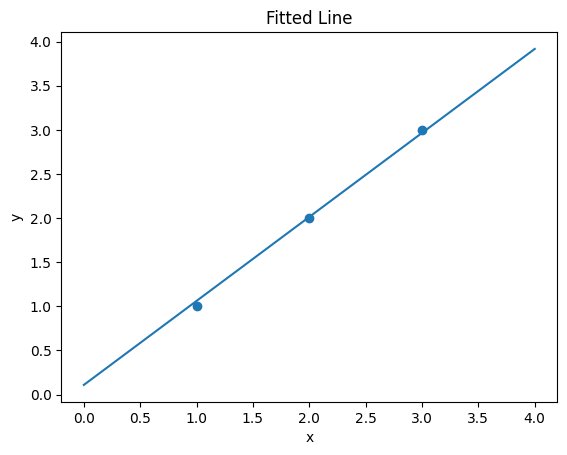

In [53]:

plt.figure()
plt.scatter(x_train, y_train)

x_line = np.linspace(min(x_train)-1, max(x_train)+1, 100)
y_line = w_final * x_line + b_final
plt.plot(x_line, y_line)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Fitted Line")
plt.show()

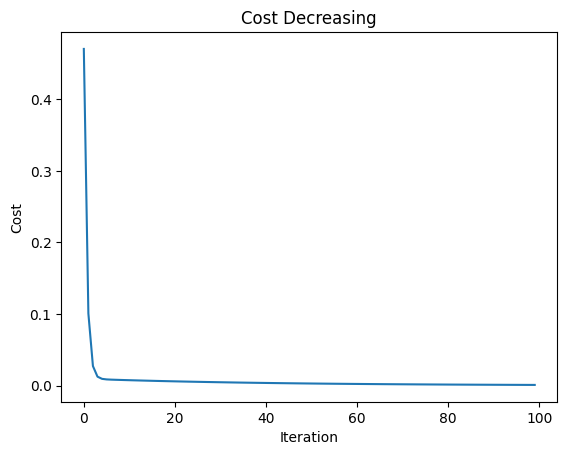

In [54]:
plt.figure()
plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Decreasing")
plt.show()